In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Mall_Customers.csv')

In [4]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


EDA

In [18]:
df.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

Encode 'Gender' column

In [15]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

In [16]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


Outliers Detect

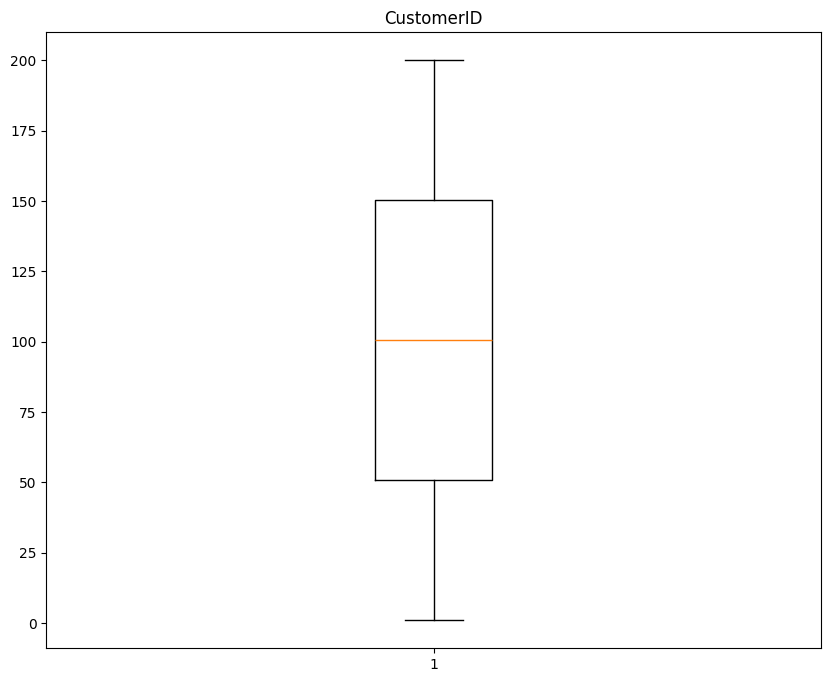

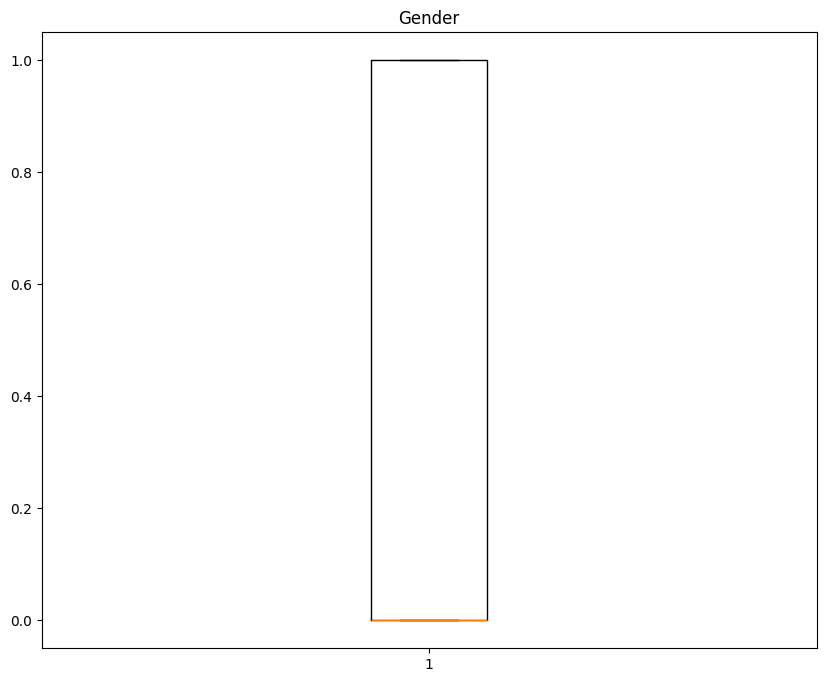

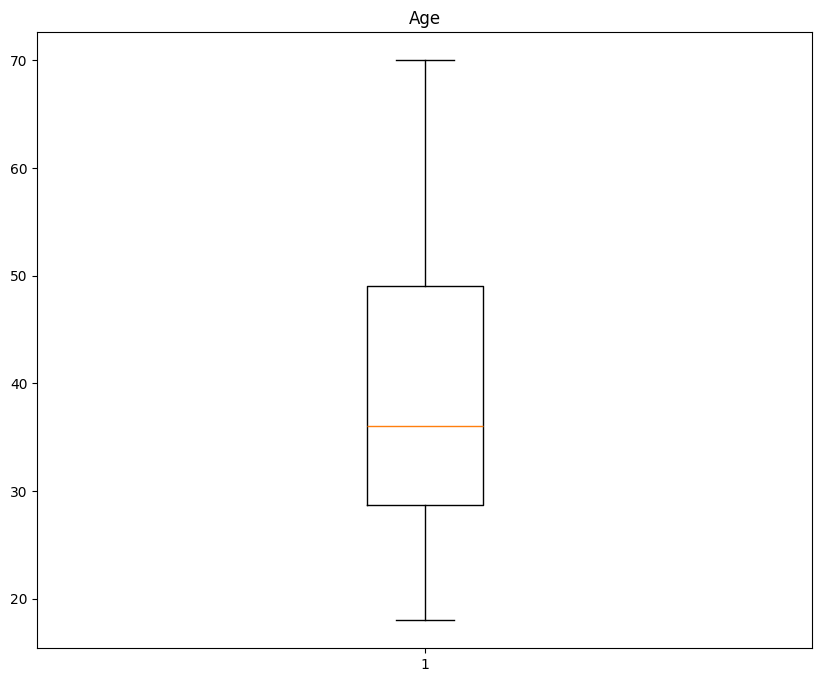

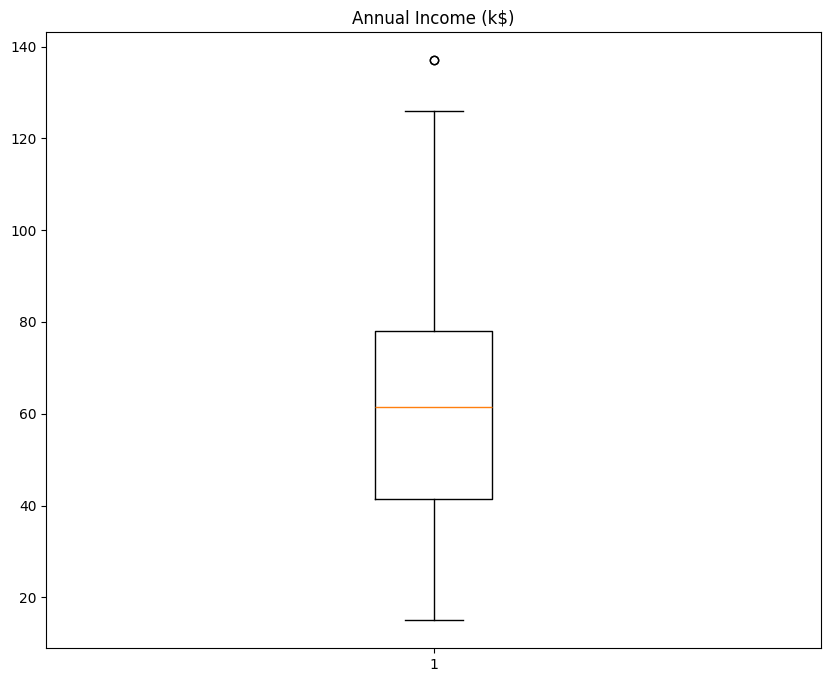

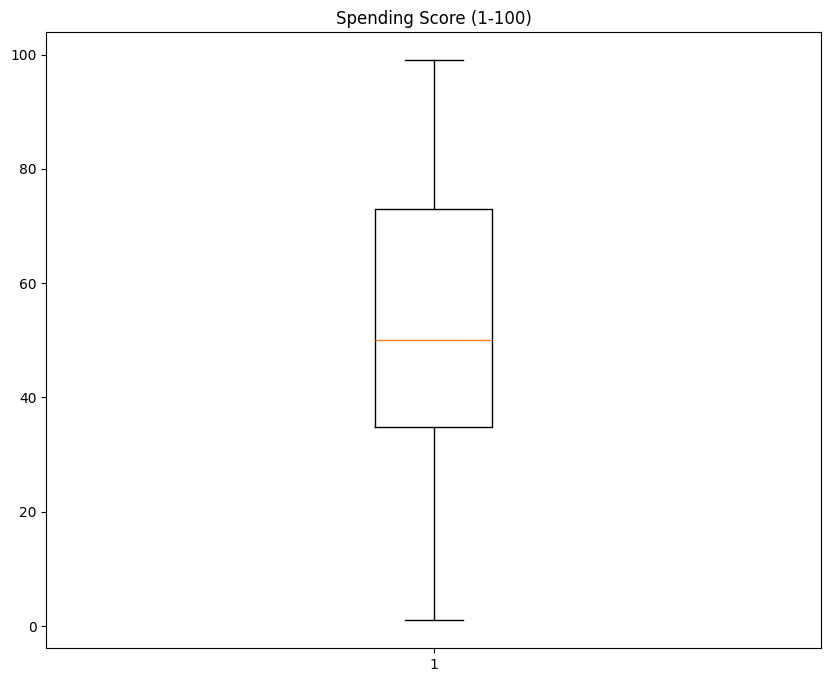

In [22]:
for col in df.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(10,8))
    plt.title(col)
    plt.boxplot(df[col])

In [80]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Prediction'],
      dtype='object')

Split the data

In [87]:
input_cols = ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [88]:
X = df[input_cols]

Building model

In [26]:
from sklearn.cluster import KMeans

In [116]:
model = KMeans(random_state=42, n_clusters=6)

In [117]:
model.fit(X)

KMeans(n_clusters=6, random_state=42)

In [118]:
preds = model.predict(X)

In [119]:
preds

array([5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2,
       5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2,
       5, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 3, 4, 0, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [120]:
model.cluster_centers_

array([[  0.40789474,  43.93421053,  55.21052632,  49.44736842],
       [  0.4       ,  32.2       , 109.7       ,  82.        ],
       [  0.44      ,  24.96      ,  28.04      ,  77.        ],
       [  0.51351351,  40.32432432,  87.43243243,  18.18918919],
       [  0.48275862,  32.86206897,  78.55172414,  82.17241379],
       [  0.39130435,  45.2173913 ,  26.30434783,  20.91304348]])

In [121]:
model.cluster_centers_[:,1]

array([43.93421053, 32.2       , 24.96      , 40.32432432, 32.86206897,
       45.2173913 ])

In [108]:
X.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

Age vs Annual Income Graph

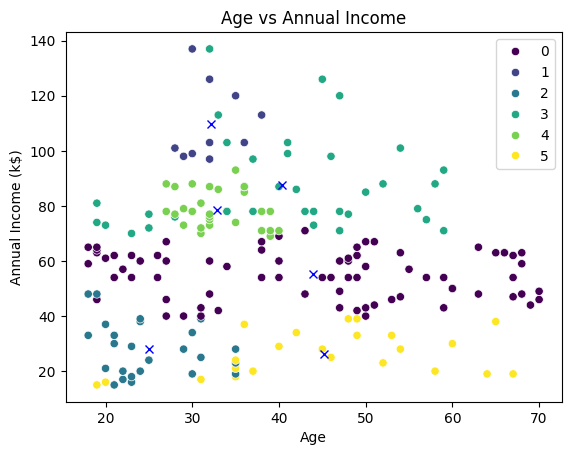

In [122]:
sns.scatterplot(data=X, x='Age', y='Annual Income (k$)', hue=preds, palette='viridis');
centers_x, centers_y = model.cluster_centers_[:,1], model.cluster_centers_[:,2]
plt.title('Age vs Annual Income')
plt.plot(centers_x, centers_y, 'xb')

Age vs Spending Score Graph

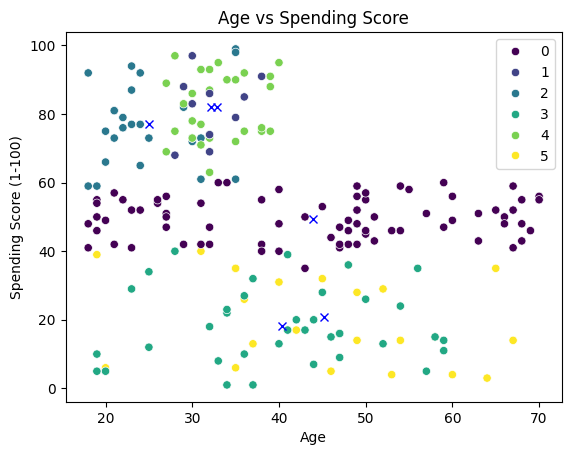

In [123]:
sns.scatterplot(data=X, x='Age', y='Spending Score (1-100)', hue=preds, palette='viridis');
centers_x, centers_y = model.cluster_centers_[:,1], model.cluster_centers_[:,3]
plt.title('Age vs Spending Score')
plt.plot(centers_x, centers_y, 'xb')

Annual Income vs Spending Score Graph

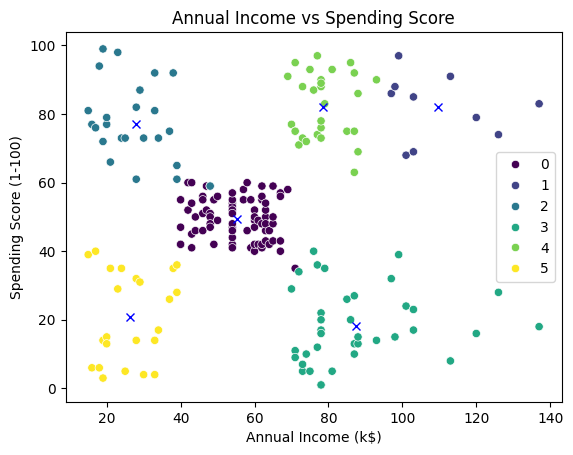

In [124]:
sns.scatterplot(data=X, x='Annual Income (k$)', y='Spending Score (1-100)', hue=preds, palette='viridis');
centers_x, centers_y = model.cluster_centers_[:,2], model.cluster_centers_[:,3]
plt.title('Annual Income vs Spending Score')
plt.plot(centers_x, centers_y, 'xb')

In [125]:
model.inertia_

68324.8224330509

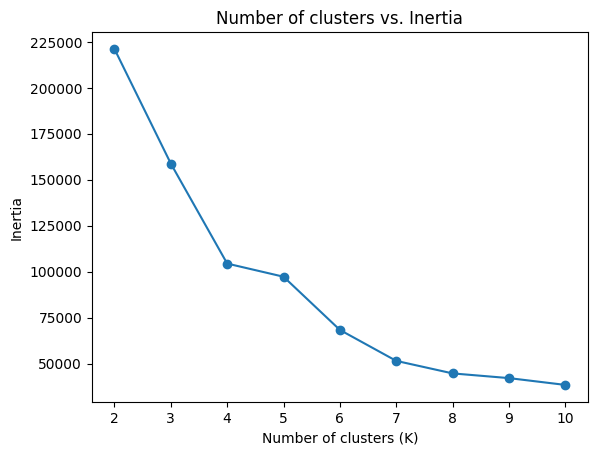

In [102]:
options = range(2,11)
inertias = []

for n_clusters in options:
    model = KMeans(n_clusters, random_state=42).fit(X)
    inertias.append(model.inertia_)
    
plt.title("Number of clusters vs. Inertia")
plt.plot(options, inertias, '-o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia');

In [126]:
df['Prediction'] = preds

In [127]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Prediction
0,1,1,19,15,39,5
1,2,1,21,15,81,2
2,3,0,20,16,6,5
3,4,0,23,16,77,2
4,5,0,31,17,40,5
...,...,...,...,...,...,...
195,196,0,35,120,79,1
196,197,0,45,126,28,3
197,198,1,32,126,74,1
198,199,1,32,137,18,3
